## High and Low Pass Filters

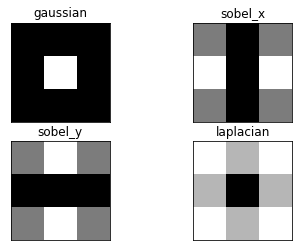

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline

gaussian = (1/9)*np.array([[1,1,1],
                           [1,1,1],
                           [1,1,1]])

sobel_x = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])

laplacian =np.array([[0,1,0],
                     [1,-4,1],
                     [0,1,0]])

filters = [gaussian,sobel_x,sobel_y,laplacian]

filter_name = ["gaussian","sobel_x","sobel_y","laplacian"]

f_filters = [np.fft.fft2(x) for x in filters]
f_shift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in f_shift]

for i in range(len(filters)):
    plt.subplot(2,2,i+1)
    plt.imshow(frequency_tx[i],cmap='gray')
    plt.title(filter_name[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

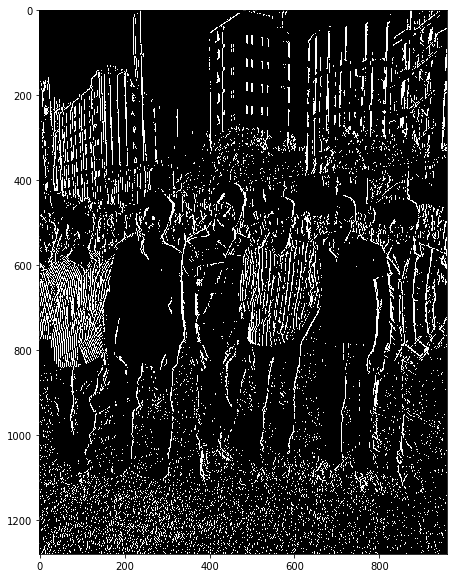

In [2]:
plt.rcParams['figure.figsize']=[24.0,10.0]

sample_test_image = cv2.imread('../../practice/images/query.jpg')
sample_test_image = cv2.cvtColor(sample_test_image,cv2.COLOR_BGR2RGB)

gray_sample_image = cv2.cvtColor(sample_test_image,cv2.COLOR_RGB2GRAY)
sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])
sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])
filtered_image = cv2.filter2D(gray_sample_image,-1,sobel_x)
retval,filtered_threshold_image = cv2.threshold(filtered_image,50,255,cv2.THRESH_BINARY)
plt.imshow(filtered_threshold_image,cmap='gray')
plt.show()